In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Khyaaat\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Khyaaat\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Khyaaat\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
train=pd.read_csv('penguins_size.csv')

In [3]:
train.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
train.shape

(344, 7)

<AxesSubplot:xlabel='sex', ylabel='count'>

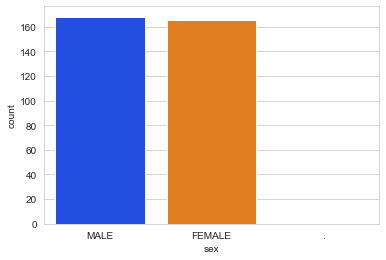

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=train,palette='bright')

In [6]:
train.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
train=train.dropna()

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

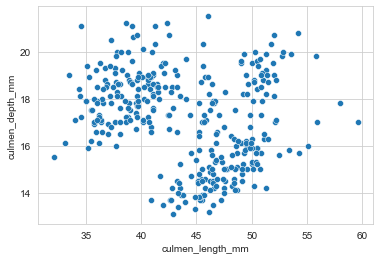

In [8]:
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', data=train)


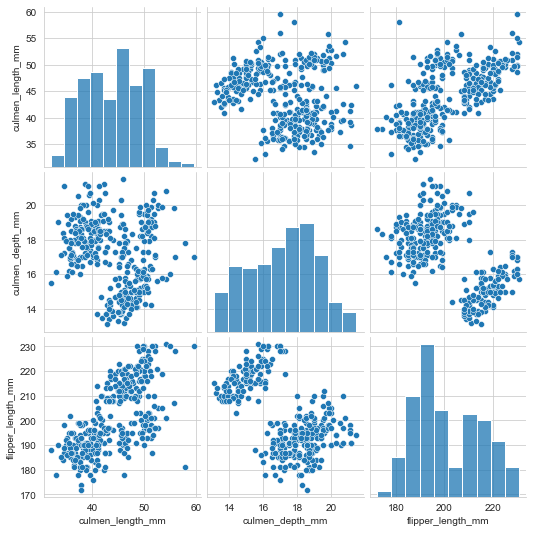

In [9]:
sns.pairplot(data=train[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']])


In [10]:
train.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


In [11]:
train.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [12]:
train=train.dropna()

<AxesSubplot:ylabel='body_mass_g'>

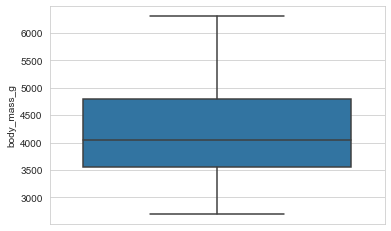

In [13]:
sns.boxplot(y=train.body_mass_g)


<AxesSubplot:ylabel='culmen_length_mm'>

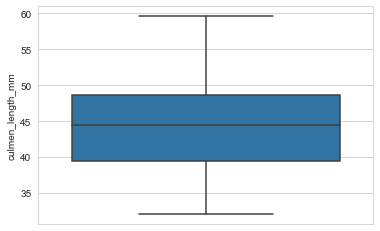

In [14]:
sns.boxplot(y=train.culmen_length_mm)


<AxesSubplot:ylabel='culmen_depth_mm'>

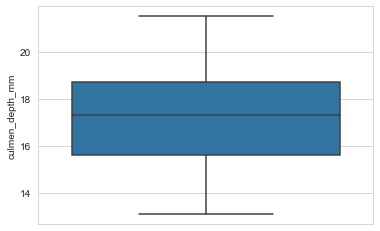

In [15]:
sns.boxplot(y=train.culmen_depth_mm)


<AxesSubplot:ylabel='flipper_length_mm'>

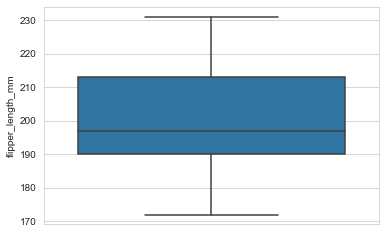

In [16]:
sns.boxplot(y=train.flipper_length_mm)


In [17]:
#No Outliers

In [18]:
train.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228640,0.652126,0.589066
culmen_depth_mm,-0.228640,1.000000,-0.578730,-0.472987
flipper_length_mm,0.652126,-0.578730,1.000000,0.873211
body_mass_g,0.589066,-0.472987,0.873211,1.000000


<AxesSubplot:>

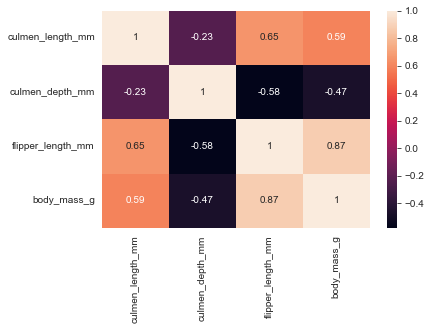

In [19]:
sns.heatmap(train.corr(),annot=True)

In [20]:
train.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [21]:
categorical_columns = train.select_dtypes(include=['object']).columns
train_encoded = pd.get_dummies(train, columns=categorical_columns, drop_first=True)


In [22]:
train_encoded.drop('sex_FEMALE',axis=1,inplace=True)
train_encoded.rename(columns={"sex_MALE": "sex"},inplace=True)
train_encoded.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex
0,39.1,18.7,181.0,3750.0,0,0,0,1,1
1,39.5,17.4,186.0,3800.0,0,0,0,1,0
2,40.3,18.0,195.0,3250.0,0,0,0,1,0
4,36.7,19.3,193.0,3450.0,0,0,0,1,0
5,39.3,20.6,190.0,3650.0,0,0,0,1,1


<AxesSubplot:>

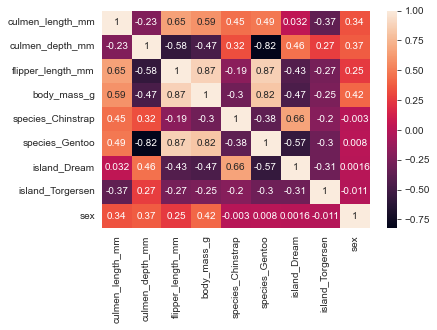

In [23]:
sns.heatmap(train_encoded.corr(),annot=True)

In [25]:
X = train_encoded.drop('sex', axis=1)
y = train_encoded['sex']

In [26]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()
     

In [32]:
X_scaled= pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
0,0.254545,0.666667,0.152542,0.291667,0.0,0.0,0.0,1.0
1,0.269091,0.511905,0.237288,0.305556,0.0,0.0,0.0,1.0
2,0.298182,0.583333,0.389831,0.152778,0.0,0.0,0.0,1.0
3,0.167273,0.738095,0.355932,0.208333,0.0,0.0,0.0,1.0
4,0.261818,0.892857,0.305085,0.263889,0.0,0.0,0.0,1.0


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=10)

In [34]:
X_train.shape

(233, 8)

In [36]:
y_train.shape


(233,)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [40]:
predictions = logmodel.predict(X_test)

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        51
           1       0.90      0.88      0.89        50

    accuracy                           0.89       101
   macro avg       0.89      0.89      0.89       101
weighted avg       0.89      0.89      0.89       101

